# Introduction

- Part 1 - To segment cars into various categories by fuel consumption and other attributes
- Part 2 - To classify a given silhouette as one of three types of vehicle, using a set of features extracted from the silhouette. The vehicle may be viewed from one of many different angles.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from scipy.stats import zscore
from sklearn.cluster import KMeans

%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Part 1.1 a - Read ‘Car name.csv’ as a DataFrame and assign it to a variable.

In [ ]:
d1 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Project_Data/Car name.csv")
d1.head(3)

,car_name
0,chevrolet chevelle malibu
1,buick skylark 320
2,plymouth satellite


### Part 1.1 b - Read ‘Car-Attributes.json as a DataFrame and assign it to a variable.

In [ ]:
d2 = pd.read_json("/content/drive/MyDrive/Colab Notebooks/Project_Data/Car-Attributes.json")
d2.head(3)

,mpg,cyl,disp,hp,wt,acc,yr,origin
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1
2,18.0,8,318.0,150,3436,11.0,70,1


In [ ]:
print(d1.shape)
print(d2.shape)

(398, 1)
(398, 8)


### Part 1.1 c - Merge both the DataFrames together to form a single DataFrame

In [ ]:
d = d1.join(d2)
print(d.shape)

(398, 9)


### Part 1.1 d - Print 5 point summary of the numerical features and share insights.

In [ ]:
d.head(5)

,car_name,mpg,cyl,disp,hp,wt,acc,yr,origin
0,chevrolet chevelle malibu,18.0,8,307.0,130,3504,12.0,70,1
1,buick skylark 320,15.0,8,350.0,165,3693,11.5,70,1
2,plymouth satellite,18.0,8,318.0,150,3436,11.0,70,1
3,amc rebel sst,16.0,8,304.0,150,3433,12.0,70,1
4,ford torino,17.0,8,302.0,140,3449,10.5,70,1


In [ ]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   car_name  398 non-null    object 
 1   mpg       398 non-null    float64
 2   cyl       398 non-null    int64  
 3   disp      398 non-null    float64
 4   hp        398 non-null    object 
 5   wt        398 non-null    int64  
 6   acc       398 non-null    float64
 7   yr        398 non-null    int64  
 8   origin    398 non-null    int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [ ]:
d.describe().T

,count,mean,std,min,25%,50%,75%,max
mpg,398.0,23.514573,7.815984,9.0,17.500,23.0,29.000,46.6
cyl,398.0,5.454774,1.701004,3.0,4.000,4.0,8.000,8.0
disp,398.0,193.425879,104.269838,68.0,104.250,148.5,262.000,455.0
wt,398.0,2970.424623,846.841774,1613.0,2223.750,2803.5,3608.000,5140.0
acc,398.0,15.568090,2.757689,8.0,13.825,15.5,17.175,24.8
yr,398.0,76.010050,3.697627,70.0,73.000,76.0,79.000,82.0
origin,398.0,1.572864,0.802055,1.0,1.000,1.0,2.000,3.0


**Insights**
- There are some outliers with respect to "mpg", "disp", "wt", "acc" attribute
- The data is right skewed for the "cyl", "disp", "origin" feature

### Part 1.2 a - Check and print feature-wise percentage of missing values present in the data and impute with the best suitable approach.


In [ ]:
# Check if any column contains "0" value
(d == 0).sum()

car_name    0
mpg         0
cyl         0
disp        0
hp          0
wt          0
acc         0
yr          0
origin      0
dtype: int64

In [ ]:
# Convert hp from Object to integer
#pd.to_numeric(d["hp"])

In [ ]:
d[d["hp"] == "?"]

,car_name,mpg,cyl,disp,hp,wt,acc,yr,origin
32,ford pinto,25.0,4,98.0,?,2046,19.0,71,1
126,ford maverick,21.0,6,200.0,?,2875,17.0,74,1
330,renault lecar deluxe,40.9,4,85.0,?,1835,17.3,80,2
336,ford mustang cobra,23.6,4,140.0,?,2905,14.3,80,1
354,renault 18i,34.5,4,100.0,?,2320,15.8,81,2
374,amc concord dl,23.0,4,151.0,?,3035,20.5,82,1


In [ ]:
d["hp"].replace("?",0, inplace=True)
pd.to_numeric(d.hp)
print("Mean: ", d.hp.mean())
print("Median: ", d.hp.median())

Mean:  102.89447236180905
Median:  92.0


In [ ]:
m = d.hp.median()
d["hp"].replace(0,m, inplace=True)
d[d.hp == 0]

,car_name,mpg,cyl,disp,hp,wt,acc,yr,origin


### Part 1.2 b - Check for duplicate values in the data and impute with the best suitable approach.

In [ ]:
d.duplicated().sum()

0

### Part 1.2 c - Plot a pairplot for all features.

In [ ]:
# Let us first scale the data
dScaled=d.iloc[:,1:].apply(zscore)

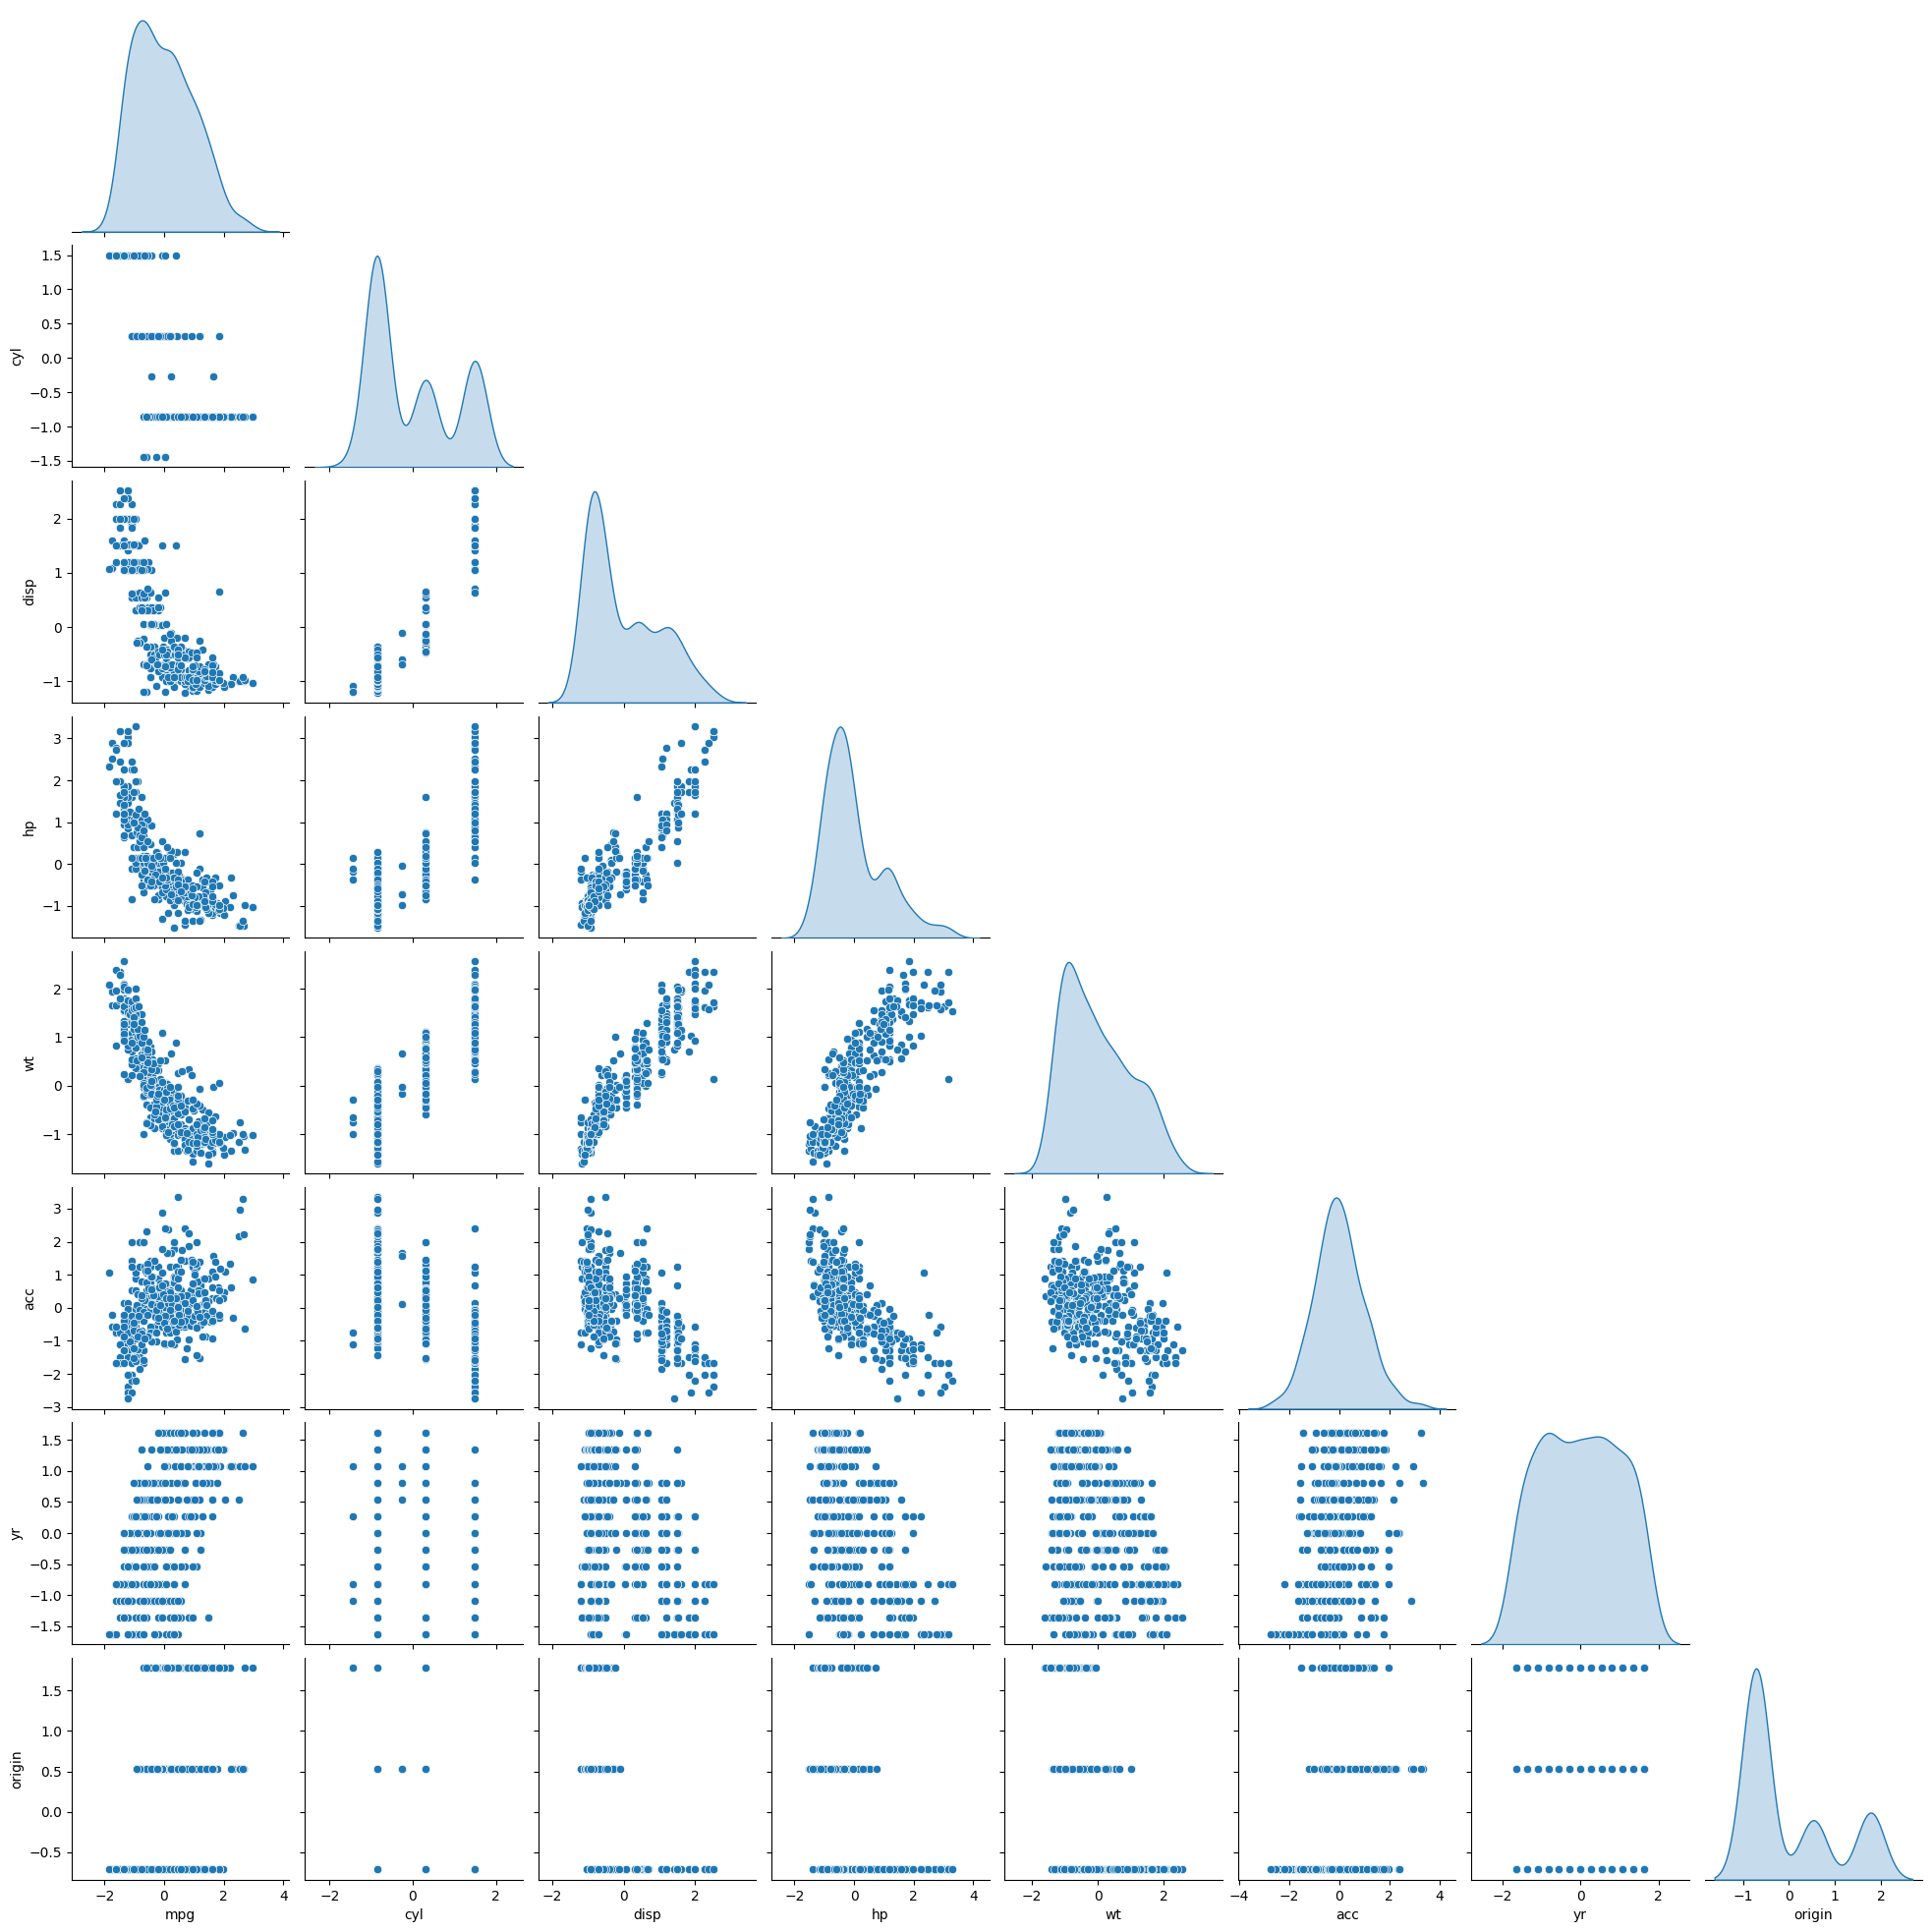

In [ ]:
sns.pairplot(dScaled,  diag_kind='kde', corner=True);

### Part 1.2 d - Visualize a scatterplot for ‘wt’ and ‘disp’. Datapoints should be distinguishable by ‘cyl’.

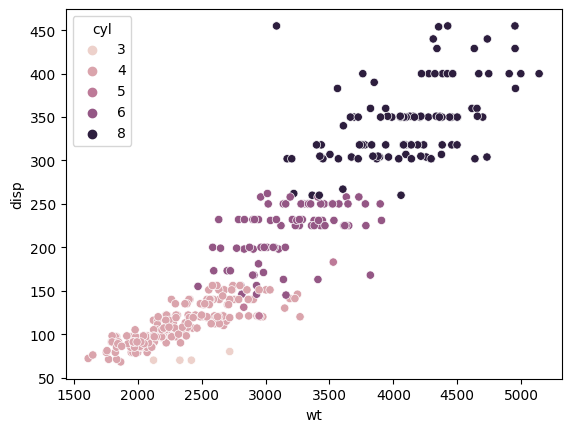

In [ ]:
sns.scatterplot(data=d, x='wt', y='disp', hue='cyl');

### Part 1.2 e - Share insights for Q2.d

**Insights**
- weight of the card and displacement are highly correlated.
- As the wigth (& displacement) increases, the number of cylinders are also increased.
- So all the 3 parameters are correlated.

### Part 1.2 f - Visualize a scatterplot for ‘wt’ and ’mpg’. Datapoints should be distinguishable by ‘cyl’.

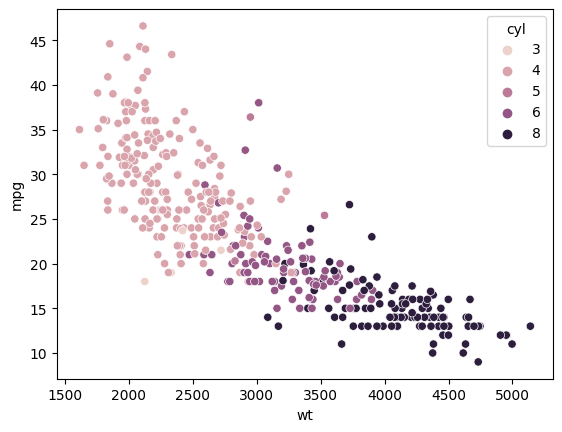

In [ ]:
sns.scatterplot(data=d, x='wt', y='mpg', hue='cyl');

### Part 1.2 g- Share insights for Q2.f.

**Insights**
- weight nd mpg are negatively correlated i.e. as the weight of the car increases, the mpg goes down.
- mpg is negatively correlated with both weight and number of cylinders.
- So as the weight increases, number of cylinders are increased, but the mpg gets lowered.

### Part 1.2 h - Check for unexpected values in all the features and datapoints with such values.

**IMP**
- "hp" attribute had "?" for 6 data points.
- This has been replaced with the median of the "hp" attribute.
- It has been converted to a numeric value in 1.2. a section

### Part 1.3 a - Apply K-Means clustering for 2 to 10 clusters.

In [ ]:
from scipy.spatial.distance import cdist
clusters=range(2,11)
meanDistortions=[]
wss =[]

for k in clusters:
    model=KMeans(n_clusters=k,n_init=10)
    model.fit(dScaled)
    meanDistortions.append(np.sum(np.min(cdist(dScaled, model.cluster_centers_, 'euclidean'), axis=1)) / dScaled.shape[0])
    wss.append(model.inertia_)    # Within Cluster Sum of Squares

df = pd.DataFrame({"meanDistortions": meanDistortions, "wss": wss}, index=range(2,11))
df

,meanDistortions,wss
2,1.914391,1588.489390
3,1.631242,1190.064586
4,1.479073,987.872429
5,1.336167,829.565066
6,1.278122,750.622861
7,1.217078,680.827550
8,1.181095,633.031135
9,1.138627,590.622065
10,1.111711,557.769146


### Part 1.3 b - Plot a visual and find elbow point

Text(0.5, 1.0, 'Selecting k with the Elbow Method')

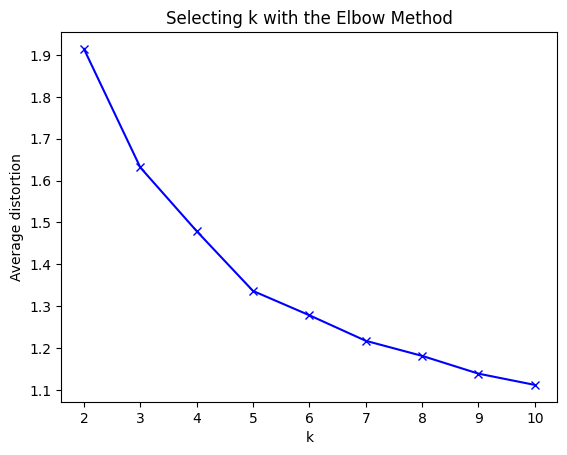

In [ ]:
plt.plot(clusters, meanDistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method')

Text(0.5, 1.0, 'Selecting k with the Elbow Method')

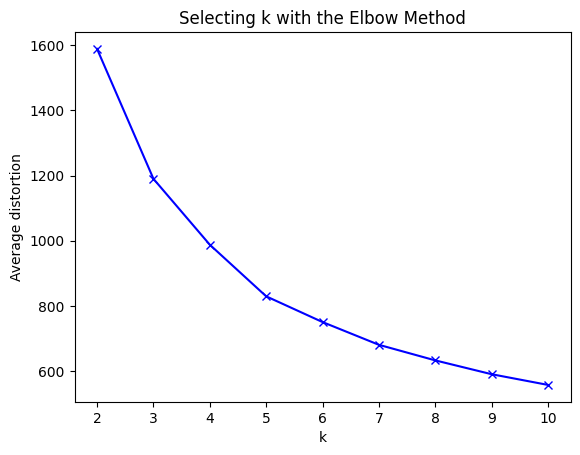

In [ ]:
plt.plot(clusters, wss, 'bx-')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method')

### Part 1.3 c - On the above visual, highlight which are the possible Elbow points.

- The Elbow points are **3 & 5**

### Part 1.3 d - Train a K-means clustering model once again on the optimal number of clusters.

In [ ]:
from sklearn.metrics import silhouette_samples, silhouette_score

# For 3 clusters
m3 = KMeans(n_clusters=3 ,n_init=10)
m3.fit(dScaled)
labels = m3.labels_
print("The silhouette score for 3 clusters is : ", silhouette_score(dScaled,labels) )

# For 5 clusters
m5 = KMeans(n_clusters=5,n_init=10)
m5.fit(dScaled)
labels = m5.labels_
print("The silhouette score for 5 clusters is : ", silhouette_score(dScaled,labels) )

The silhouette score for 3 clusters is :  0.3246725445650651
The silhouette score for 5 clusters is :  0.3330195537524946


- The silhouette score is better for 5 clusters than for 3 clusters. So, final clusters will be 5

### Part 1.3 e - Add a new feature in the DataFrame which will have labels based upon cluster value

In [ ]:
d['Labels'] = m5.labels_

### Part 1.3 f -Plot a visual and color the datapoints based upon clusters.

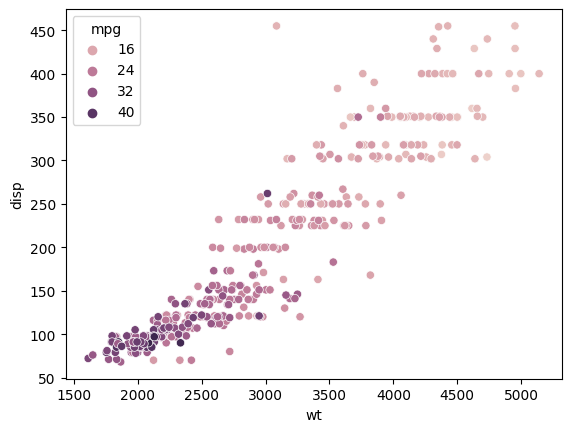

In [ ]:
# Plot of actual clusters grouped by mpg value

# d['mpg_bins'] = pd.cut(d['mpg'],bins=[10,20,30,40,50],labels=['16','24','32','40'], right = False)
sns.scatterplot(data=d, x='wt', y='disp', hue='mpg');

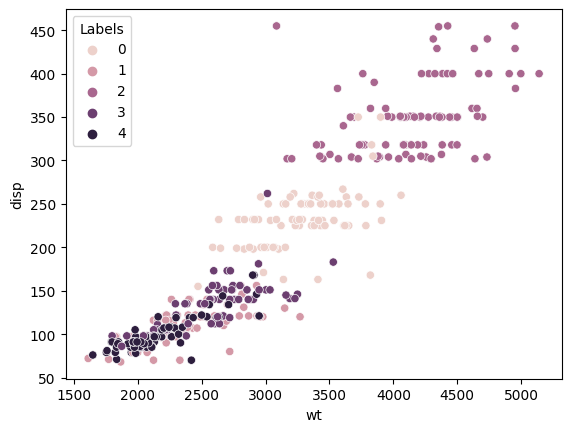

In [ ]:
sns.scatterplot(data=d, x='wt', y='disp', hue='Labels');

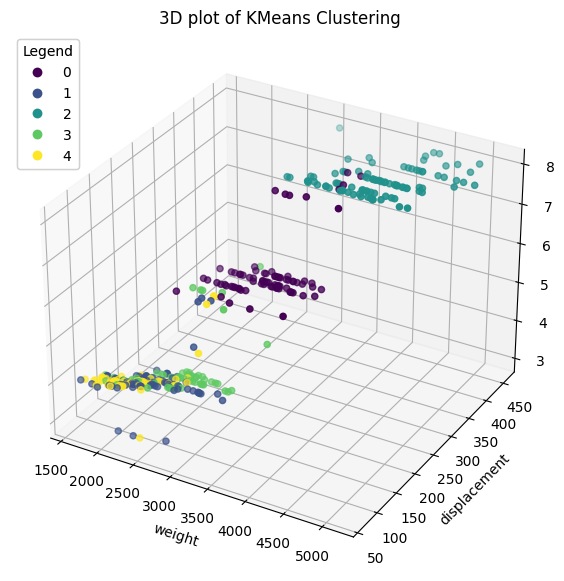

In [ ]:
# Creating figure
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")

# Creating plot
scatter1=ax.scatter3D(d.wt, d.disp, d.cyl, c=d.Labels)
legend1 = ax.legend(*scatter1.legend_elements(), title="Legend", loc='upper left')
ax.add_artist(legend1)
ax.set_xlabel('weight')
ax.set_ylabel('displacement')
ax.set_zlabel('cylinders')
ax.set_title('3D plot of KMeans Clustering');
plt.show()

### Part 1.3 g - Pass a new DataPoint and predict which cluster it belongs to

In [ ]:
d.columns[1:-1]

Index(['mpg', 'cyl', 'disp', 'hp', 'wt', 'acc', 'yr', 'origin'], dtype='object')

In [ ]:
vals = [[                # "Hyndai creta",
       19,              # mpg
       4,               # cyl
       149.3,           # disp
       113.4,           # hp
       1690,            # wt
       9.97,            # acc
       99,            # yr
       3                # origin
      ]]
new = pd.DataFrame(vals,columns=d.columns[1:-1])
new["Labels"]=m5.predict(new)

print(new.Labels[0])

2


In [ ]:
d[d.Labels == 4].head(5)

,car_name,mpg,cyl,disp,hp,wt,acc,yr,origin,Labels
129,datsun b210,31.0,4,79.0,67,1950,19.0,74,3,4
131,toyota corolla 1200,32.0,4,71.0,65,1836,21.0,74,3,4
144,toyota corona,31.0,4,76.0,52,1649,16.5,74,3,4
145,datsun 710,32.0,4,83.0,61,2003,19.0,74,3,4
181,honda civic cvcc,33.0,4,91.0,53,1795,17.5,75,3,4


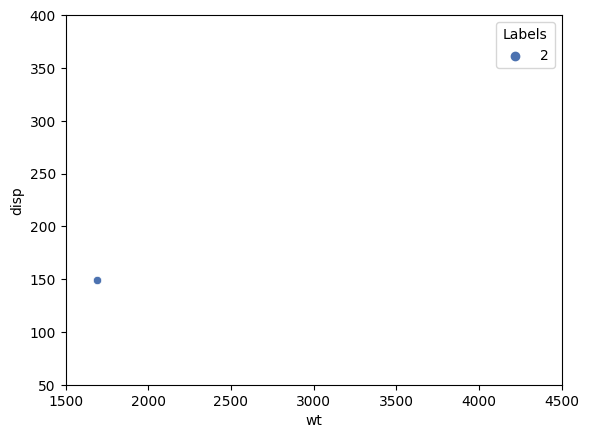

In [ ]:
g = sns.scatterplot(data=new, x='wt', y='disp', hue='Labels',palette="deep");
g.set_yticks(range(50,450,50))
g.set_xticks(range(1500,5000,500))

In [ ]:
p = d[d.Labels == 4].describe().T
p["New Data Values"] = new.values.T
p

,count,mean,std,min,25%,50%,75%,max,New Data Values
mpg,72.0,34.137500,4.936996,23.7,31.575,33.25,37.00,46.6,19.00
cyl,72.0,4.083333,0.436051,3.0,4.000,4.00,4.00,6.0,4.00
disp,72.0,99.527778,19.986596,70.0,86.000,91.00,107.25,168.0,149.30
hp,72.0,72.833333,16.506934,48.0,65.000,68.00,75.00,132.0,113.40
wt,72.0,2155.819444,298.972387,1649.0,1973.750,2077.50,2292.50,2950.0,1690.00
acc,72.0,16.734722,2.437914,11.4,14.975,16.45,18.20,24.6,9.97
yr,72.0,79.416667,2.173788,74.0,78.000,80.00,81.00,82.0,99.00
origin,72.0,2.763889,0.427672,2.0,3.000,3.00,3.00,3.0,3.00
Labels,72.0,4.000000,0.000000,4.0,4.000,4.00,4.00,4.0,2.00


**Observations :**
- It seems the new data point is not similar to the data points in the cluster which it has been assigned to (4)
- It looks a very different (a complete outlier) for this cluster.
- More analysis is needed to understand why it has been assigned to this cluster and which is the suitable cluster for this new data point.

### Part 2. 1 a - Read ‘vehicle.csv’ and save as DataFrame.

In [ ]:
d = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Project_Data/vehicle.csv")
d.head(3)

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,van
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,van
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,car


In [ ]:
d.shape

(846, 19)

In [ ]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   compactness                  846 non-null    int64  
 1   circularity                  841 non-null    float64
 2   distance_circularity         842 non-null    float64
 3   radius_ratio                 840 non-null    float64
 4   pr.axis_aspect_ratio         844 non-null    float64
 5   max.length_aspect_ratio      846 non-null    int64  
 6   scatter_ratio                845 non-null    float64
 7   elongatedness                845 non-null    float64
 8   pr.axis_rectangularity       843 non-null    float64
 9   max.length_rectangularity    846 non-null    int64  
 10  scaled_variance              843 non-null    float64
 11  scaled_variance.1            844 non-null    float64
 12  scaled_radius_of_gyration    844 non-null    float64
 13  scaled_radius_of_gyr

In [ ]:
d.describe().T

,count,mean,std,min,25%,50%,75%,max
compactness,846.0,93.678487,8.234474,73.0,87.00,93.0,100.0,119.0
circularity,841.0,44.828775,6.152172,33.0,40.00,44.0,49.0,59.0
distance_circularity,842.0,82.110451,15.778292,40.0,70.00,80.0,98.0,112.0
radius_ratio,840.0,168.888095,33.520198,104.0,141.00,167.0,195.0,333.0
pr.axis_aspect_ratio,844.0,61.678910,7.891463,47.0,57.00,61.0,65.0,138.0
max.length_aspect_ratio,846.0,8.567376,4.601217,2.0,7.00,8.0,10.0,55.0
scatter_ratio,845.0,168.901775,33.214848,112.0,147.00,157.0,198.0,265.0
elongatedness,845.0,40.933728,7.816186,26.0,33.00,43.0,46.0,61.0
pr.axis_rectangularity,843.0,20.582444,2.592933,17.0,19.00,20.0,23.0,29.0
max.length_rectangularity,846.0,147.998818,14.515652,118.0,137.00,146.0,159.0,188.0


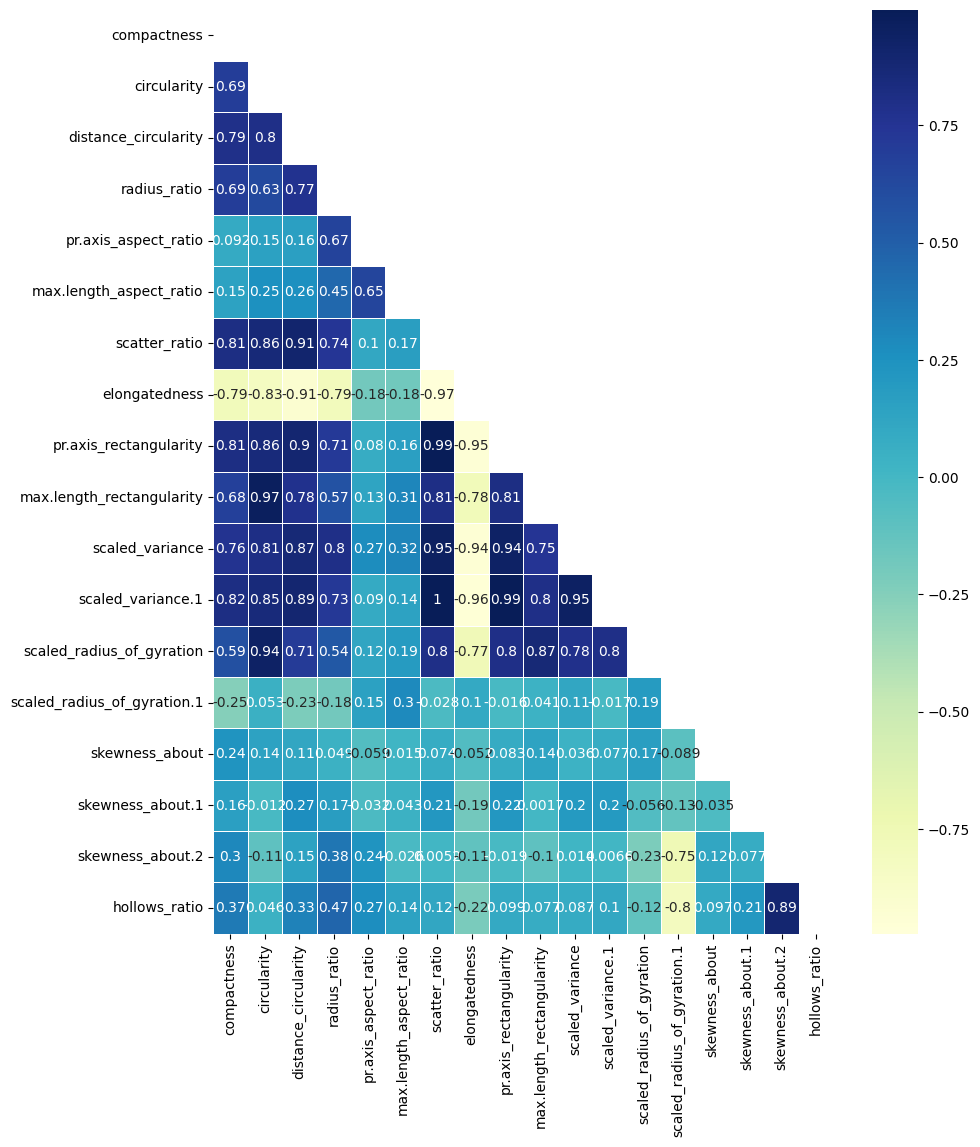

In [ ]:
corr = d.corr(numeric_only=True)
matrix = np.triu(corr)

fig, ax = plt.subplots(figsize=(10,12))
sns.heatmap(data=corr, annot=True, cmap='YlGnBu', linewidths=.5, ax=ax, mask=matrix);

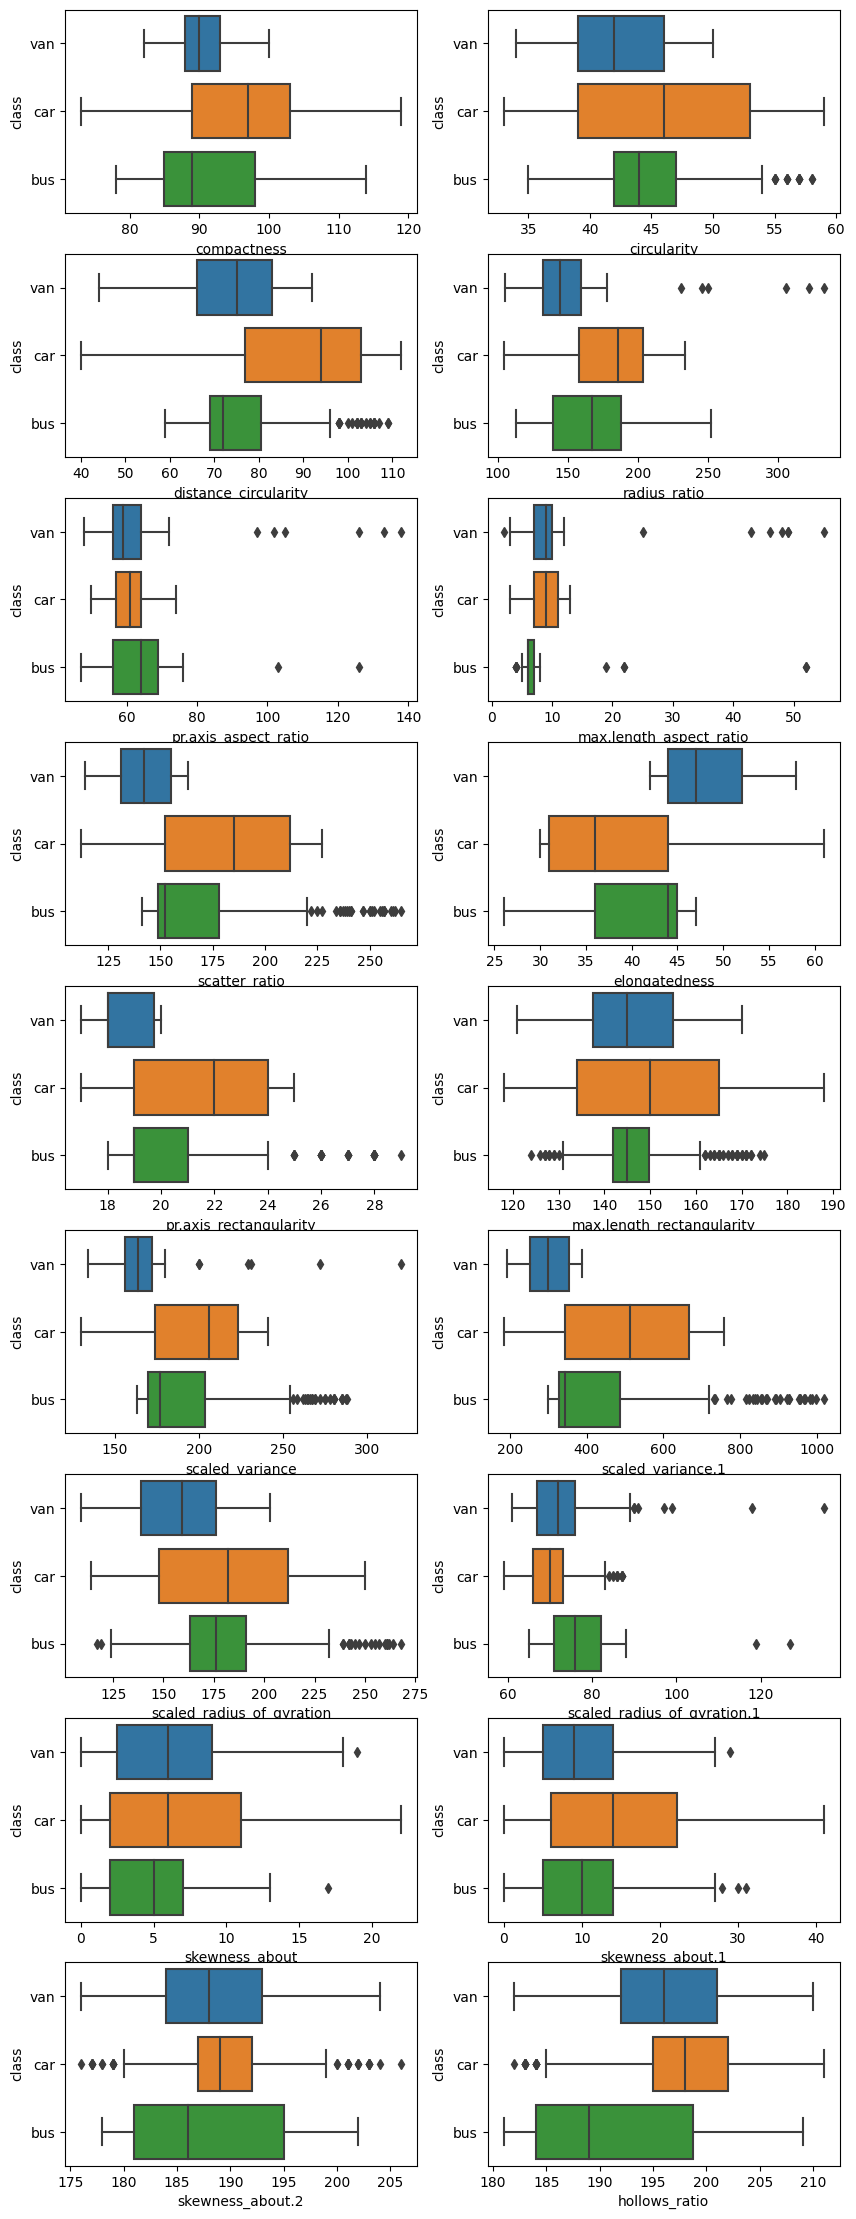

In [ ]:
f, ax = plt.subplots(9, 2, figsize=(10,28))    #10, 28
index=0
for i in range(9):
  for j in range(2):
    col = d.columns[index]
    index += 1
    sns.boxplot(  x= col, data=d,  ax=ax[i,j], y='class')

### Part 2.1 b- Check percentage of missing values and impute with correct approach.

In [ ]:
df = pd.DataFrame({"Number" : d.isnull().sum() , "Percentage" : np.round(d.isnull().sum()/d.shape[0] * 100,2)}, index = d.columns)
df[df.Number != 0]

,Number,Percentage
circularity,5,0.59
distance_circularity,4,0.47
radius_ratio,6,0.71
pr.axis_aspect_ratio,2,0.24
scatter_ratio,1,0.12
elongatedness,1,0.12
pr.axis_rectangularity,3,0.35
scaled_variance,3,0.35
scaled_variance.1,2,0.24
scaled_radius_of_gyration,2,0.24


In [ ]:
# For all attributes with missing values,
# replace the missing values with the median of the attribute of respective class

cols = df[df.Number != 0].index
for col_name in cols:

  # get list of classes for all missing value data points
  classes = d[d[col_name].isnull()]['class'].unique()
  dic = {}

  # find median of the attribute for each class
  for c in classes:
    attrib_class_median = d[d['class'] == c][col_name].median()
    dic.update({c : attrib_class_median})

  print("Column Name: ", col_name, " \t\t\t Medians : ", dic)

  # Assign the median value to the missing date as per the class
  rows = d[d[col_name].isnull()].index
  # print(no_of_rows)
  for row in rows:
    # get the class for the data point
    class_name = d.iloc[row]['class']
    # get the median value from the dictionary
    attrib_class_median = dic[class_name]
    # assign the median to the respective attribute in the data point
    d.loc[row, col_name] = attrib_class_median

Column Name:  circularity  			 Medians :  {'bus': 44.0, 'car': 46.0}
Column Name:  distance_circularity  			 Medians :  {'van': 75.0, 'bus': 72.0}
Column Name:  radius_ratio  			 Medians :  {'car': 186.0, 'bus': 167.5, 'van': 144.0}
Column Name:  pr.axis_aspect_ratio  			 Medians :  {'car': 61.0, 'bus': 64.0}
Column Name:  scatter_ratio  			 Medians :  {'car': 185.0}
Column Name:  elongatedness  			 Medians :  {'car': 36.0}
Column Name:  pr.axis_rectangularity  			 Medians :  {'car': 22.0, 'bus': 19.0, 'van': 18.0}
Column Name:  scaled_variance  			 Medians :  {'car': 206.0, 'van': 164.0}
Column Name:  scaled_variance.1  			 Medians :  {'car': 512.0}
Column Name:  scaled_radius_of_gyration  			 Medians :  {'bus': 176.0}
Column Name:  scaled_radius_of_gyration.1  			 Medians :  {'bus': 76.0, 'car': 70.0}
Column Name:  skewness_about  			 Medians :  {'bus': 5.0, 'car': 6.0}
Column Name:  skewness_about.1  			 Medians :  {'car': 14.0}
Column Name:  skewness_about.2  			 Medians :  {'car':

### Part 2.1 c- Visualize a Pie-chart and print percentage of values for variable ‘class’.

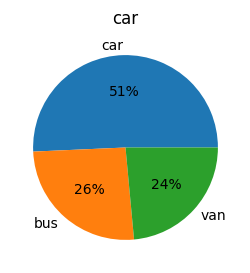

In [ ]:
fig, ax = plt.subplots(figsize=(3,3))
data = d["class"].value_counts()
ax.pie(data.values,labels = data.index, autopct='%.0f%%')
plt.title(c)
plt.show()

### Part 2.1 d - Check for duplicate rows in the data and impute with correct approach.

In [ ]:
if (d.duplicated().sum() == 0):
  print("There are no duplicate rows.")
else:
  print("There are  duplicate rows.")

There are no duplicate rows.


### Part 2.2 a - Split data into X and Y.

In [ ]:
X = d.iloc[:,:-1]
y = d.iloc[:,-1]

In [ ]:
y.replace({"car":1,"bus":2,"van":3},inplace=True)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

### Part 2.2 b - Standardize the Data

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)

### Part 2.3 a - Train a base Classification model using SVM

In [ ]:
from sklearn import svm

clf = svm.SVC(gamma=0.025, C=2)
clf.fit(X_train , y_train)

SVC(C=2, gamma=0.025)

### Part 2.3 b - Print Classification metrics for train data.

In [ ]:
print("Training data score: " , clf.score(X_train, y_train))

X_test = sc.transform(X_test)
print("Test data score: " , clf.score(X_test, y_test))

Training data score:  0.977810650887574
Test data score:  0.9705882352941176


In [ ]:
# Classification metrics for train data
y_pred = clf.predict(X_train)
pd.crosstab(y_pred, y_train)

class,1,2,3
row_0,,,
1,335,1,5
2,1,176,1
3,3,4,150


### Part 2.3 c - Apply PCA on the data with 10 components.

In [ ]:
from scipy.stats import zscore
XScaled=X.apply(zscore)

In [ ]:
# covMatrix = np.cov(XScaled,rowvar=False)
# print(covMatrix)

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=10)
pca.fit(XScaled)

PCA(n_components=10)

In [ ]:
print(np.round(pca.explained_variance_,2))

[9.41 3.02 1.9  1.18 0.92 0.54 0.36 0.22 0.16 0.09]


In [ ]:
print(np.round(pca.explained_variance_ratio_,2))

[0.52 0.17 0.11 0.07 0.05 0.03 0.02 0.01 0.01 0.01]


### Part 2.3 d - Visualize Cumulative Variance Explained with Number of Components.

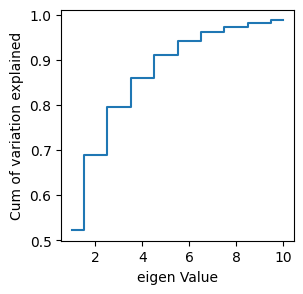

In [ ]:
fig, ax = plt.subplots(figsize=(3,3))
ax.step(list(range(1,11)),np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Cum of variation explained')
plt.xlabel('eigen Value')
plt.show()

### Part 2.3 e - Draw a horizontal line on the above plot to highlight the threshold of 90%.

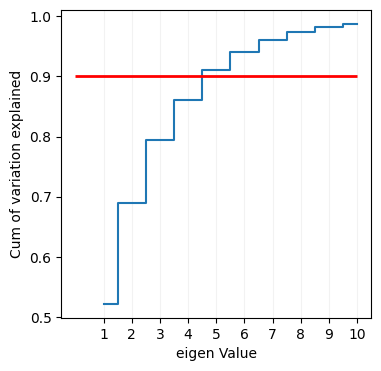

In [ ]:
fig, ax = plt.subplots(figsize=(4,4))

ax.step(list(range(1,11)),np.cumsum(pca.explained_variance_ratio_), where='mid')
ax.grid(axis='x', color='0.95')
ax.hlines(y=0.9, xmin=0, xmax=10, linewidth=2, color='r')

plt.xticks(range(1,11))
plt.ylabel('Cum of variation explained')
plt.xlabel('eigen Value')
plt.show()


**Note :**
- The 90% threshold line crosses the x-ticks at X=**5**
- So number of components for PCA with 90% or above varaince explained is **5**

### Part 2.3 f - Apply PCA on the data. This time Select Minimum Components with 90% or above variance explained.

In [ ]:
pca = PCA(n_components=5)
pca.fit(XScaled)
print("Variance : ", np.round(pca.explained_variance_,2))
print("Variance ration: ", np.round(pca.explained_variance_ratio_,2))
print("Cumulative varaiance : ", np.round(pca.explained_variance_ratio_.sum(),2))

Variance :  [9.41 3.02 1.9  1.18 0.92]
Variance ration:  [0.52 0.17 0.11 0.07 0.05]
Cumulative varaiance :  0.91


### Part 2.3 g - Train SVM model on components selected from above step.

In [ ]:
Xpca = pca.transform(XScaled)

In [ ]:
clf = svm.SVC(gamma=0.025, C=2)
clf.fit(Xpca , y)

print("Accuracy score: " , np.round(clf.score(Xpca, y),2))

Accuracy score:  0.78


### Part 2.3 h - Print Classification metrics for train data of above model and share insights.

In [ ]:
y_pred = clf.predict(Xpca)
pd.crosstab(y_pred, y)

class,1,2,3
row_0,,,
1,380,37,39
2,13,151,33
3,36,30,127


**Insights -**
- The accuracy has dropped from 97% to **78%**
- The variance was dropped from 100% to 91%.
- So the **expected accuracy** with 90% varaiance PCA components is **88%**

### Part 2.4 a - Train another SVM on the components out of PCA. Tune the parameters to improve performance.

In [ ]:
from sklearn.model_selection import GridSearchCV

#List Hyperparameters that we want to tune.
gamma = [0.1,0.025,1,10]
C = [2,5,7,8,10,12,15,20,30]

#Convert to dictionary
hyperparameters = dict(gamma=gamma, C=C)

#Create new SVM object
model = svm.SVC()

#Use GridSearch
clf = GridSearchCV(model, hyperparameters, cv=2, return_train_score=True)

#Fit the model
best_model = clf.fit(Xpca,y)

print('Best gamma:', best_model.best_estimator_.get_params()['gamma'])
print('Best C:', best_model.best_estimator_.get_params()['C'])

Best gamma: 0.1
Best C: 7


In [ ]:
# Let us print the top scores and the respective paramter values

param1,param2 = [], []
for i in clf.cv_results_["params"]:
  param1.append(i['gamma'])
  param2.append(i['C'])

rd = pd.DataFrame({"Rank":clf.cv_results_["rank_test_score"],
                   "Test Sc":clf.cv_results_["mean_test_score"],
                   "Train Sc":clf.cv_results_["mean_train_score"],
                   "Gamma":param1,
                   "C":param2})
rd.sort_values(by="Rank").head(5)

,Rank,Test Sc,Train Sc,Gamma,C
8,1,0.799054,0.881797,0.1,7
16,1,0.799054,0.894799,0.1,10
12,3,0.797872,0.887707,0.1,8
28,4,0.795508,0.911348,0.1,20
24,5,0.791962,0.898345,0.1,15


In [ ]:
# Sort the result by Test score

rd.sort_values(by="Test Sc",ascending=False).head(5)

,Rank,Test Sc,Train Sc,Gamma,C
8,1,0.799054,0.881797,0.1,7
16,1,0.799054,0.894799,0.1,10
12,3,0.797872,0.887707,0.1,8
28,4,0.795508,0.911348,0.1,20
24,5,0.791962,0.898345,0.1,15


In [ ]:
# Sort the result by Train score

rd.sort_values(by="Train Sc",ascending=False).head(5)

,Rank,Test Sc,Train Sc,Gamma,C
18,18,0.739953,1.0,1.0,10
11,28,0.539007,1.0,10.0,7
34,22,0.738771,1.0,1.0,30
31,28,0.539007,1.0,10.0,20
30,22,0.738771,1.0,1.0,20


In [ ]:
rd[rd["Train Sc"] != 1].sort_values(by="Train Sc",ascending=False).head(5)

,Rank,Test Sc,Train Sc,Gamma,C
14,18,0.739953,0.998818,1.0,8
6,18,0.739953,0.998818,1.0,5
10,18,0.739953,0.998818,1.0,7
2,22,0.738771,0.984634,1.0,2
32,7,0.787234,0.924350,0.1,30


In [ ]:
#rd.sort_values(by="Train Sc",ascending=False)

In [ ]:
# Let us fit the model with best parameters

clf = svm.SVC(gamma=0.1, C=7)
clf.fit(Xpca , y)

print("Accuracy score: " , np.round(clf.score(Xpca, y),2))

Accuracy score:  0.89


### Part 2.4 b- Share best Parameters observed from above step.

**Observation :**
- The initial gamma and C values were : gamma = 0.025 & C = 2
- With these parameters the accuracy score (using PCA components) was 78%
- After tuning the parameters we got **89%** accuracy.
- The expcted accuracy for 90% variance PCA compnents was 88%. We achived this accuracy with following parameers :
- The best parameters are **gamma = 0.1 and C = 7**

**Conclusion :**
- As we increase the value **C** we get better accuracy.
- The model is overfitted if gamma value is high such as 0.1 or 10.
- With gamma = 0.025, the model is balanced (not overfitted)
- So **the best gamma value is 0.025**
- The model is best trained (balnced) with the parameter values as - gamma = 0.025 and C = 12 (77% Test accuracy and 82% Training score)

**Note :**
The C hyperparameter tells the SVM optimization how much you want to avoid misclassifying each training example. For large values of C, the optimization will choose a smaller-margin hyperplane if that hyperplane does a better job of getting all the training points classified correctly. Conversely, a very small value of C will cause the optimizer to look for a larger-margin separating hyperplane, even if that hyperplane misclassifies more points. For very tiny values of C, you should get misclassified examples, often even if your training data is linearly separable.

https://stats.stackexchange.com/questions/31066/what-is-the-influence-of-c-in-svms-with-linear-kernel